# More API Examples

This notebook contains EVEN MORE API examples so you can get an idea of the types of services available. There's a world of API's out there for the taking, and we cannot teach them all to you. We can only teach you how they work in general... the details are 100% up to you!

Key takeaways from this demonstration -

- Many API's out there 
- Countless ways to call an API
- All use HTTP which means they will pass data via query string header, URL, and request body.
- Most require some form of authentication
- Most return JSON, some return XML. JSON is easier to de-serialize in Python
- You must read the documentation to figure out how to use them!
- Stick to using the HTTP prococol - avoid their sample code in Python or some other language.


### No guarantees my API keys will still work... get your own keys!!!


In [ ]:
import requests

# Earthquakes anyone?

Here's an example of the significant earthquakes from the past week. Information on this API can be found here:

http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php 

This is an example of a really simple API which does not require any authentication. These are rare!


In [ ]:
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_hour.geojson"
response = requests.get(url)
quakes = response.json()
for quake in quakes['features']:
    print(quake['properties']['title'])

# Searching iTunes

Here's an example of the iTunes search API. I'm searching for "Bruce Springsteen" and printing out the track names.

https://itunes.apple.com/search 

This example uses the query string, but it does not require any authentication

In [ ]:
url = "https://itunes.apple.com/search"
query_string = {'term' : 'bruce springsteen'}
response = requests.get(url, params = query_string)
print(response.url)
tunes = response.json()

for tune in tunes['results']:
    artist = tune.get('artistName','Unknown Artist')
    collection = tune.get('collectionName', 'Unknown Album')
    track = tune.get('trackName', 'Unknown Song')
    print(f"{artist} {collection} {track}")
    

# Get current exchange rates

This example uses http://fixer.io to get the current currency exchange rates. 

This API demonstrates use of the query string to pass in the API key.


In [ ]:
apikey = '159f1a48ad7a3d6f4dbe5d5a71c2135c' # get your own at fixer.io
params = { 'access_key': apikey } # US Dollars
response = requests.get("http://data.fixer.io/api/latest", params=params )
print(response.url)
rates = response.json()
rates

# Caller Id/ Get a location for a Phone number

This uses the cosmin phone number lookup API as found on https://market.mashape.com/explore Mashape is a Web API marketplace / aggregator of API's.

This api requires `headers` to be passed into the `get()` request. The API key and the requested output of `json` are sent into the header.

Enter a phone number as input like `3154432911` and then the API will output JSON data consisting of caller ID data and GPS coordinates.

In [ ]:
phone = '3154439686'
params = { 'phone' : phone }
headers={ "X-Mashape-Key": "sNi0LJs3rBmshZL7KQOrRWXZqIsBp1XUjhnjsnYUsE6iKo14Nc",
    "Accept": "application/json" }
response = requests.get("https://cosmin-us-phone-number-lookup.p.mashape.com/get.php", params=params, headers=headers )
print(response.url)
phone_data = response.json()
phone_data

# GeoIP lookup: Find the lat/lng of an IP Address

Every computer on the internet has a unique IP Address. http://api.ipstack.com service when given an IP address will return back where that IP Address is located. Pretty handy API which is commonly used with mobile devices to determine approximate location when the GPS is turned off. 

This example demonstrates URL manipulation, which some API's require.

In [47]:
ip = "128.230.182.170"
apikey = 'f9117fcd34312f9083a020af5836e337'
url = f"http://api.snoopi.io/{ip}"
query_string = { 'access_key' : apikey}
response = requests.get(url, params = query_string)
print(response.url)
response.json()

http://api.snoopi.io/1.1.1.1?access_key=f9117fcd34312f9083a020af5836e337


{'CountryCode': 'AU',
 'CountryName': 'Australia',
 'GeoID': 2077456,
 'State': None,
 'StateCode': None,
 'City': None,
 'Postal': None,
 'Latitude': -33.494,
 'Longitude': 143.2104,
 'TimeZone': 'Australia/Sydney',
 'Continent': {'Code': 'OC',
  'Languages': {'en': 'Oceania',
   'de': 'Ozeanien',
   'es': 'Oceanía',
   'fr': 'Océanie',
   'ja': 'オセアニア',
   'br': 'Oceania',
   'ru': 'Океания',
   'cn': '大洋洲'}},
 'RequestTime': 1584628121,
 'RequestedIP': '128.230.247.170'}

## An API for sentiment analysis...

Process some text and more here: http://text-processing.com 

This example shows how to call an API which uses an HTTP POST to send large quantities of data to the service.

Also consider Azure Cognitive Services.


In [62]:
text = "It look much longer to put together than I thought, but it turned out beautiful. It took one day just putting the door together. Some instructions in English would help a great deal, instead of just diagrams. It's working quite well so far and I have to wait and see when weather gets really cold. Love the hanging plant things, but wished it came with hooks for that small hole. Don't know whether it will support big plants, though. Will start by hanging a couple of small planters with S hooks. Make sure your ground is really flat and even, because we had the front 2\" lower than the back for drainage, and had to readjust the bricks so the greenhouse balances out perfectly flat. That took 2 people one day."
url = "http://text-processing.com/api/sentiment/"
payload = { 'text' : text }
response = requests.post(url, data = payload)
print(response.url)
response.json()

http://text-processing.com/api/sentiment/


{'probability': {'neg': 0.7343094400834301,
  'neutral': 0.1735011701079663,
  'pos': 0.26569055991656987},
 'label': 'neg'}

# Spotify

The spotify example shows you how to call an API which uses the OAUTH2 prococol. **This is a two step process.** The first request, you request a token, and in the second request you call the api with that token. Twitter, Facebook, Google, and many other services use this approach.

Typically you will use the **client credentials flow** (https://tools.ietf.org/html/rfc6749#section-4.4), which does not explicitly require the user to consent. 
https://developer.spotify.com/documentation/general/guides/authorization-guide/

API's that use this approach will issue you a client id and a client secret. The id is always the same but the secret may be changed. 

We use that client id and client secret to get an bearer access token. Notice how we pass into the post a named argument `auth=` which authenticates with the client id/secret.

Next we use the bearer access token to make subsequent calls to the api.






In [77]:
client_id = "f12d413fe60240a7ad1881bcca301a34"
client_secret = "92ed3f6eae3c49a8a9a5c82cb00cfb15"

# Step one, get the access token
payload = { 'grant_type' : 'client_credentials'}
response = requests.post("https://accounts.spotify.com/api/token", auth=(client_id,client_secret),data=payload)
token = response.json()['access_token']
print(f"Access token: {token}")

# Step two and beyond, use the access token to call the api
while True:
    url = "https://api.spotify.com/v1/search"
    text = input("Enter artist or quit: ")
    if text == 'quit':
        break
    query_string = { 'q' : text , 'type' : 'artist'}
    headers = { 'Authorization' : f"Bearer {access_token}"}

    response = requests.get(url, headers=header, params = query_string)
    print(response.json())

Access token: BQA-v0kf58QyiVNe0xPjdG2qEj23Ti64LR0MDJJU_zn2TCsQr5sZsZBV_afqlAQP9nm7IMjKmoqSI9z1P2A
Enter artist or quit: Bon Jovi
{'artists': {'href': 'https://api.spotify.com/v1/search?query=Bon+Jovi&type=artist&offset=0&limit=20', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/58lV9VcRSjABbAbfWS6skp'}, 'followers': {'href': None, 'total': 7535871}, 'genres': ['glam metal', 'rock'], 'href': 'https://api.spotify.com/v1/artists/58lV9VcRSjABbAbfWS6skp', 'id': '58lV9VcRSjABbAbfWS6skp', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/255476a832d9647d73ed03ae51727cb911c565df', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/14970473a72c23a3848c43ca87531584d655e98d', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/24b7d7bd55aeb2f53f10b33941a7724c1cdd88fc', 'width': 160}], 'name': 'Bon Jovi', 'popularity': 79, 'type': 'artist', 'uri': 'spotify:artist:58lV9VcRSjABbAbfWS6skp'}, {'external_urls': {'spotify': 'https://open.spotify.

Enter artist or quit: Nelly
{'artists': {'href': 'https://api.spotify.com/v1/search?query=Nelly&type=artist&offset=0&limit=20', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2gBjLmx6zQnFGQJCAQpRgw'}, 'followers': {'href': None, 'total': 1457123}, 'genres': ['dance pop', 'hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'urban contemporary'], 'href': 'https://api.spotify.com/v1/artists/2gBjLmx6zQnFGQJCAQpRgw', 'id': '2gBjLmx6zQnFGQJCAQpRgw', 'images': [{'height': 749, 'url': 'https://i.scdn.co/image/3677690af58abb70a5c5fd58d69db4d1ad705d4f', 'width': 1000}, {'height': 479, 'url': 'https://i.scdn.co/image/67f24249e5cffd1aa7446195d91110baa90be253', 'width': 640}, {'height': 150, 'url': 'https://i.scdn.co/image/21daa12d457ad51f11604307d371d0ed7c312ec1', 'width': 200}, {'height': 48, 'url': 'https://i.scdn.co/image/0e9958a7cd6d43078f2b7ed1b8f243c3bb2081b7', 'width': 64}], 'name': 'Nelly', 'popularity': 76, 'type': 'artist', 'uri': 'spotify:artist:2gBjLmx6zQn

Enter artist or quit: quit


### Get the most positive and negative online reviews about a business

How well to the ratings match the sentiment of the review text? 

- Learn the Yelp API
- Search for a business and get reviews
- Use sentiment analysis to get the highest rating with the highest sentiment
- Time permitting do negative
- Demonstrate the problem simplification approach from bottom up

```
1. prompt for a location eg. Syracuse
2. prompt for a cuisine eg. Thai
3. search yelp for that cuisine in that location
4. for each rest. in that matching search:
5.    use yelp to get the reviews for that rest
6.    for each review in rest.reviews:
7.      get the sentiment of the text of the review
8.      print the reviewer name, the review rating 1-5, the sentiment score.
```

In [85]:
def yelp_search(location, cuisine):
    yelpkey = 'PKt-vCvtw-G0WGjf-DKITO0I07fFi6rTt6WuT2vfecT3xCzSMaD1Uf2uKPuN-1A_1gwRZ15qx4DBEWDyYpV4p_3yh-aqAiPUXGxIkken2gCAq8-sXO4W4zh6ZZ_TW3Yx'
    params = { 'term' : cuisine, 'location' : location}
    header = {'Authorization' : f'Bearer {yelpkey}'}
    url = 'https://api.yelp.com/v3/businesses/search'
    response = requests.get(url, params = params, headers = header)
    return response.json()['businesses']


yelp_search('Syracuse, ny', 'thai')
    

[{'id': 'knoT2pa13_fSnrDAMC18Ng',
  'alias': 'thai-love-ny-syracuse',
  'name': 'Thai Love NY',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/q0kxhcj_qrw4gyF24b4vwQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/thai-love-ny-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=H2mBmGHSsANIEiZZaA4ZyA',
  'review_count': 187,
  'categories': [{'alias': 'thai', 'title': 'Thai'}],
  'rating': 4.5,
  'coordinates': {'latitude': 43.097, 'longitude': -76.14502},
  'transactions': ['pickup', 'delivery'],
  'price': '$$',
  'location': {'address1': '2822 Lemoyne Ave',
   'address2': None,
   'address3': '',
   'city': 'Syracuse',
   'zip_code': '13211',
   'country': 'US',
   'state': 'NY',
   'display_address': ['2822 Lemoyne Ave', 'Syracuse, NY 13211']},
  'phone': '+13159285659',
  'display_phone': '(315) 928-5659',
  'distance': 3977.354744180868},
 {'id': 'su6OgvIv5u5Wx_c0adqPiw',
  'alias': 'thai-

In [94]:
def yelp_reviews(id):
    url = f"https://api.yelp.com/v3/businesses/{id}/reviews"
    yelpkey = 'PKt-vCvtw-G0WGjf-DKITO0I07fFi6rTt6WuT2vfecT3xCzSMaD1Uf2uKPuN-1A_1gwRZ15qx4DBEWDyYpV4p_3yh-aqAiPUXGxIkken2gCAq8-sXO4W4zh6ZZ_TW3Yx'
    header = {'Authorization' : f'Bearer {yelpkey}'}
    response = requests.get(url, headers = header)
    return response.json()['reviews']


yelp_reviews('knoT2pa13_fSnrDAMC18Ng')

[{'id': 'OOWSf9EB4GJw0mgyiKEeMw',
  'url': 'https://www.yelp.com/biz/thai-love-ny-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&hrid=OOWSf9EB4GJw0mgyiKEeMw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=H2mBmGHSsANIEiZZaA4ZyA',
  'text': 'Grest red curry.  Gang dang chicken is my favorite.\n\nI also like the sophisticated jazz background music.  \n\nThere are a lot of good Thai restaurants in...',
  'rating': 5,
  'time_created': '2020-01-16 11:41:43',
  'user': {'id': 'xpkLW6OLbVUsiXVB1sgJZw',
   'profile_url': 'https://www.yelp.com/user_details?userid=xpkLW6OLbVUsiXVB1sgJZw',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/jAMjKfXi2C7za99Yomy7UQ/o.jpg',
   'name': 'Jeffrey B.'}},
 {'id': '7pGcTJsSvn9sESKgO_UZFg',
  'url': 'https://www.yelp.com/biz/thai-love-ny-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&hrid=7pGcTJsSvn9sESKgO_UZFg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=H2mBmGHSsANIEiZZaA4ZyA',
  'text': "I am a Tha

In [100]:
def get_sentiment(text):
    url = "http://text-processing.com/api/sentiment/"
    payload = { 'text' : text }
    response = requests.post(url, data = payload)
    return response.json()['label']
    
    
get_sentiment('you are the best')

'pos'

Enter a location: Bronx, NY
Enter a cuisine: Pizza


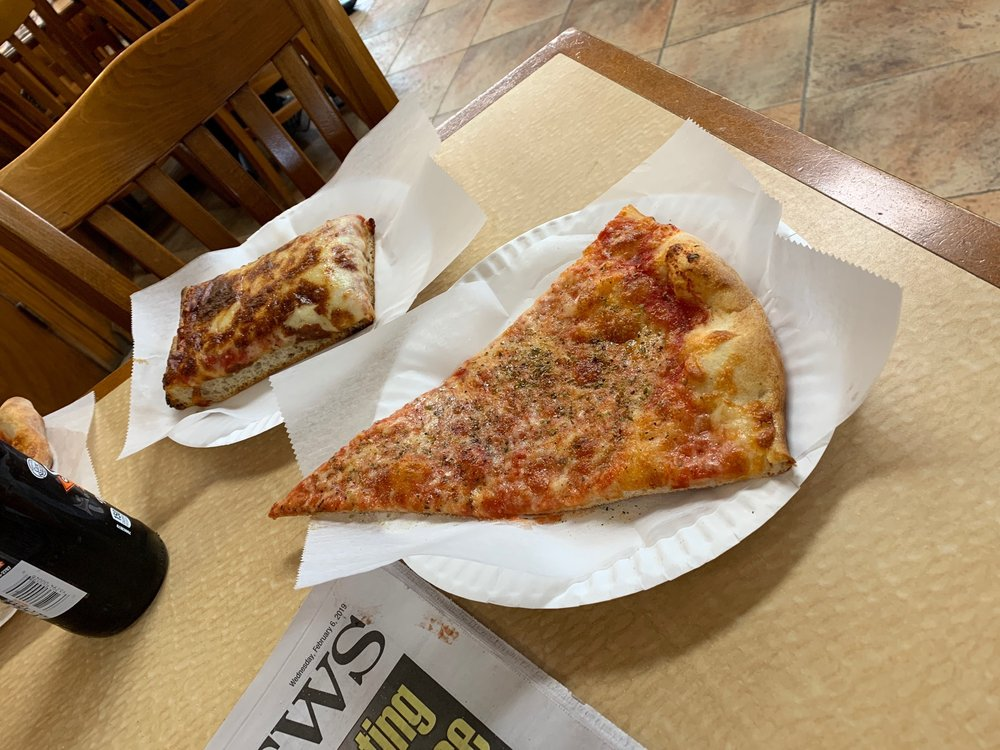

John B. 5 pos
A D. 4 neutral
Alexander R. 5 neg


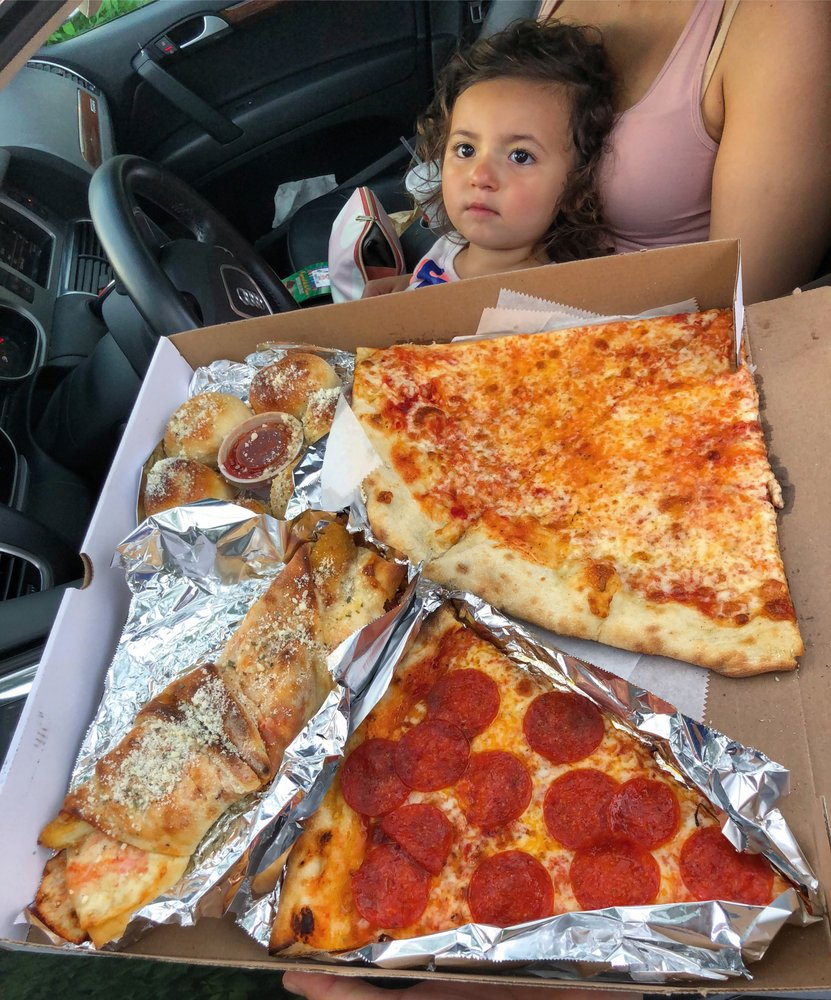

Roy C. 5 neutral
Amanda V. 5 pos
Jeanne M. 5 neutral


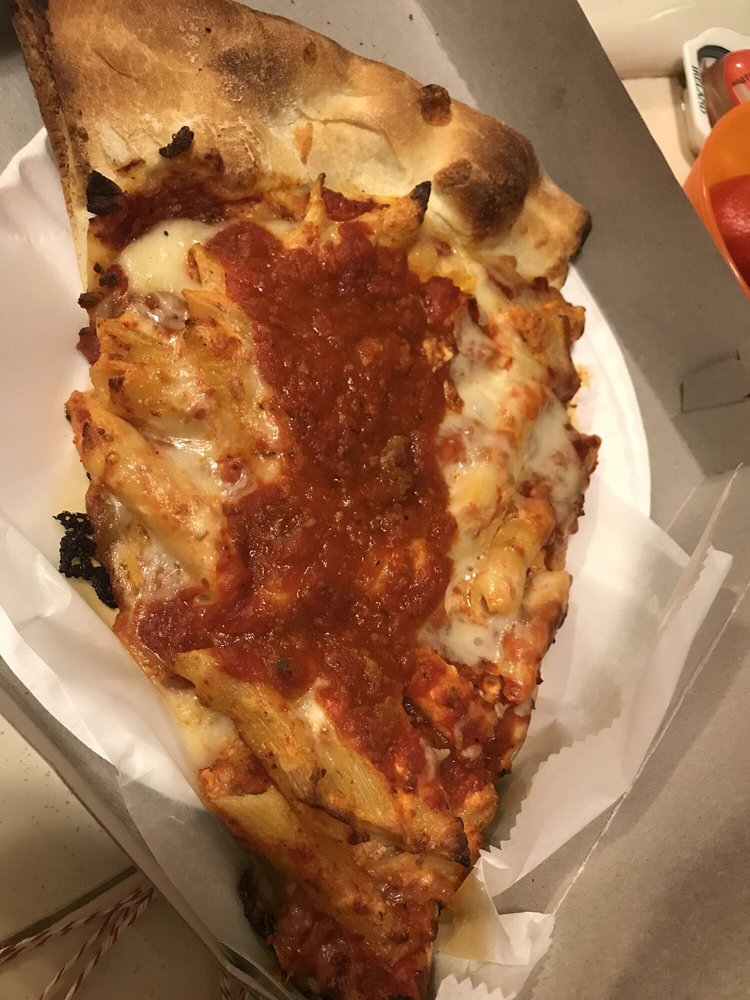

Kisbel F. 5 neutral
Edwin R. 4 neutral
Ilir B. 5 pos


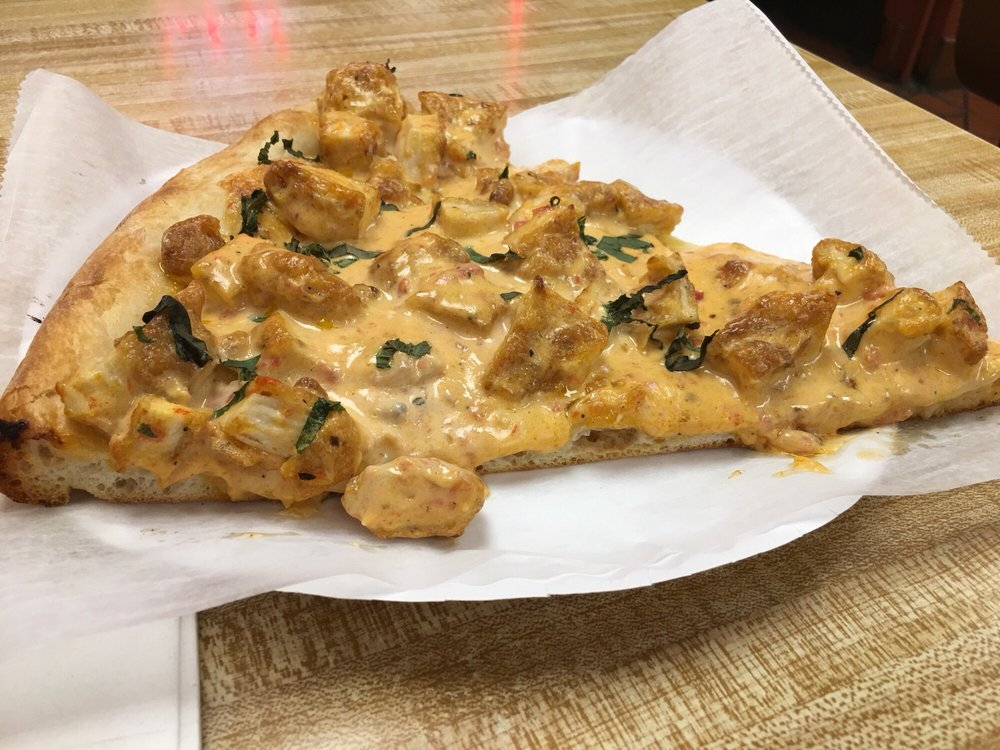

Mercedes C. 4 neg
Liz V. 5 pos
Dale J. 5 pos


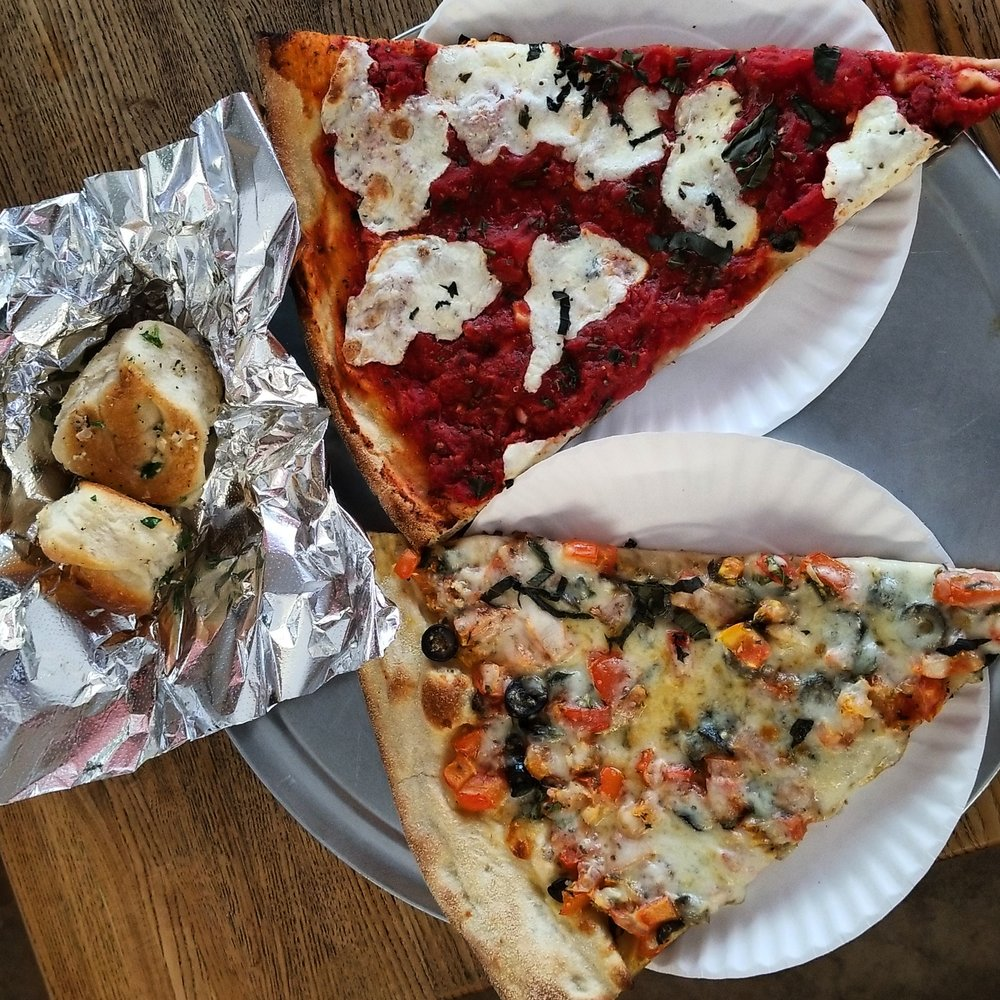

Marietta C. 5 pos
Phil R. 5 neg
Ursula T. 5 neg


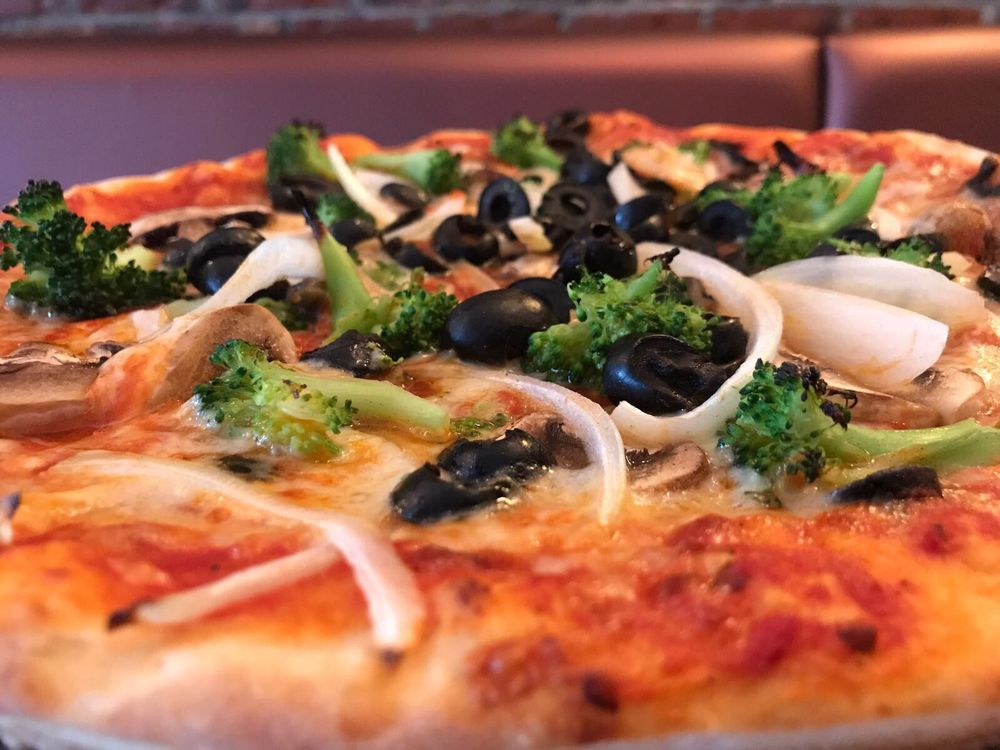

Marilyn R. 5 pos
Sara Z. 5 neutral
Deana B. 5 neg


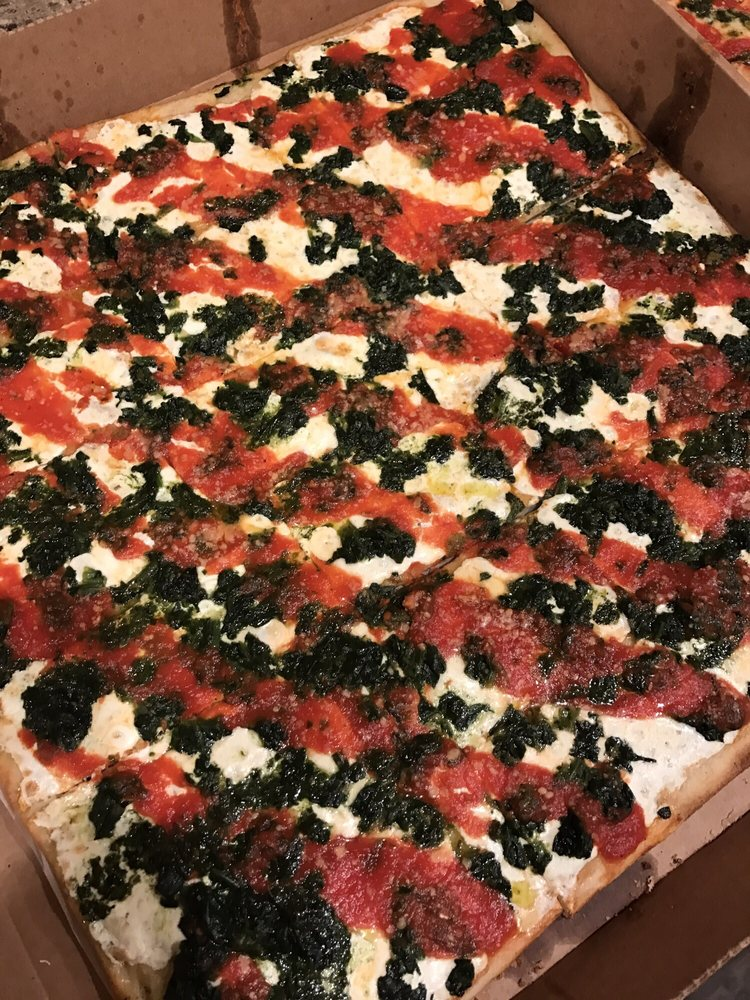

Shantel A. 5 neutral
Charlie M. 5 pos
Cathy D. 1 neutral


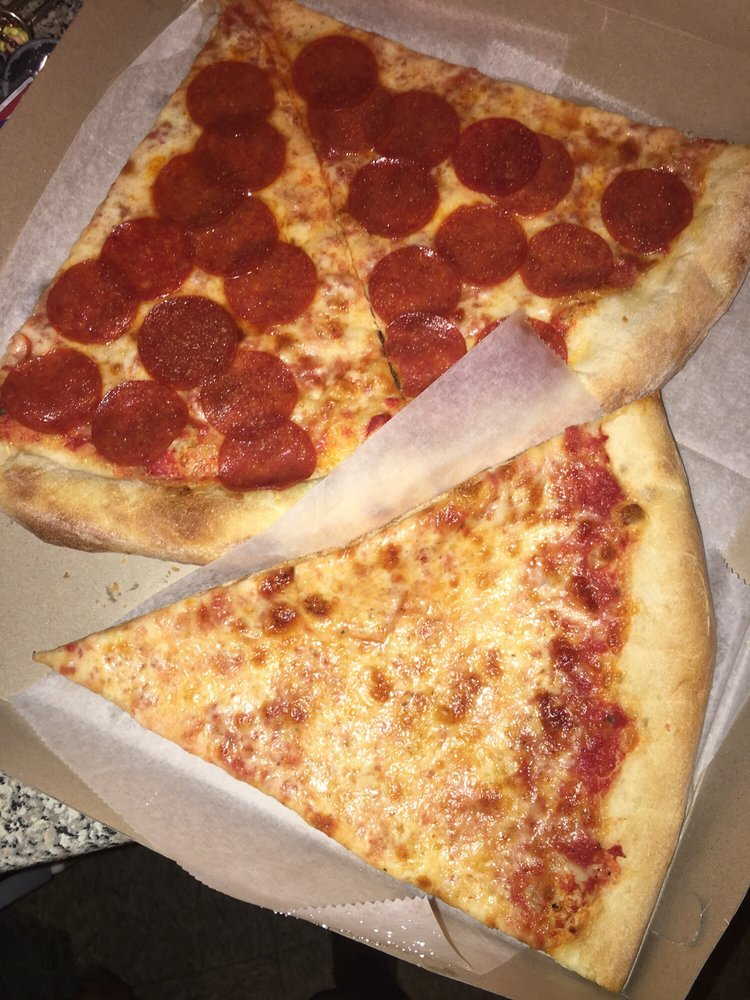

Nacey P. 5 neutral
Sonia T. 5 neutral
Joanie C. 5 neutral


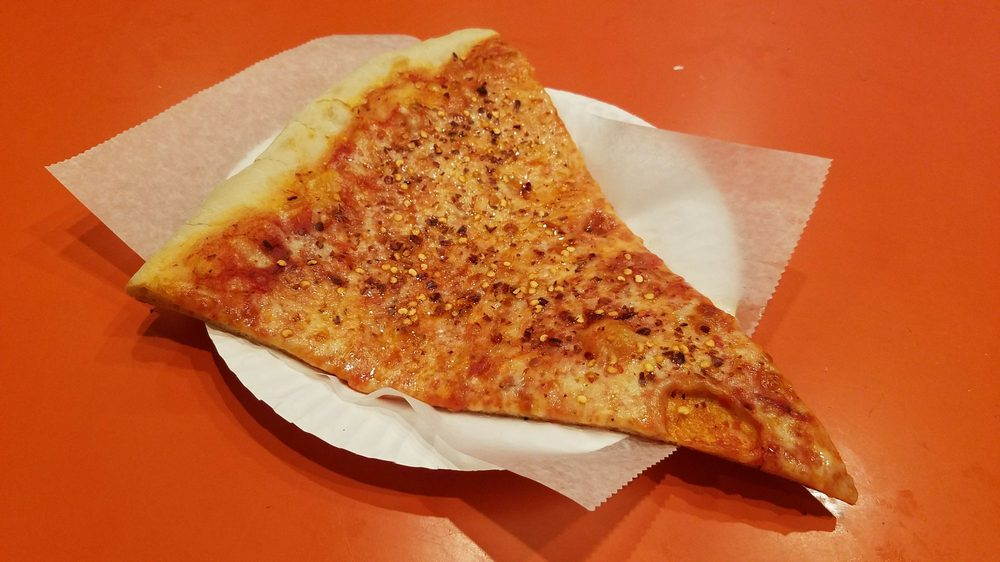

Elvin R. 5 neutral
Heather C. 5 pos
Mairenis C. 1 neg


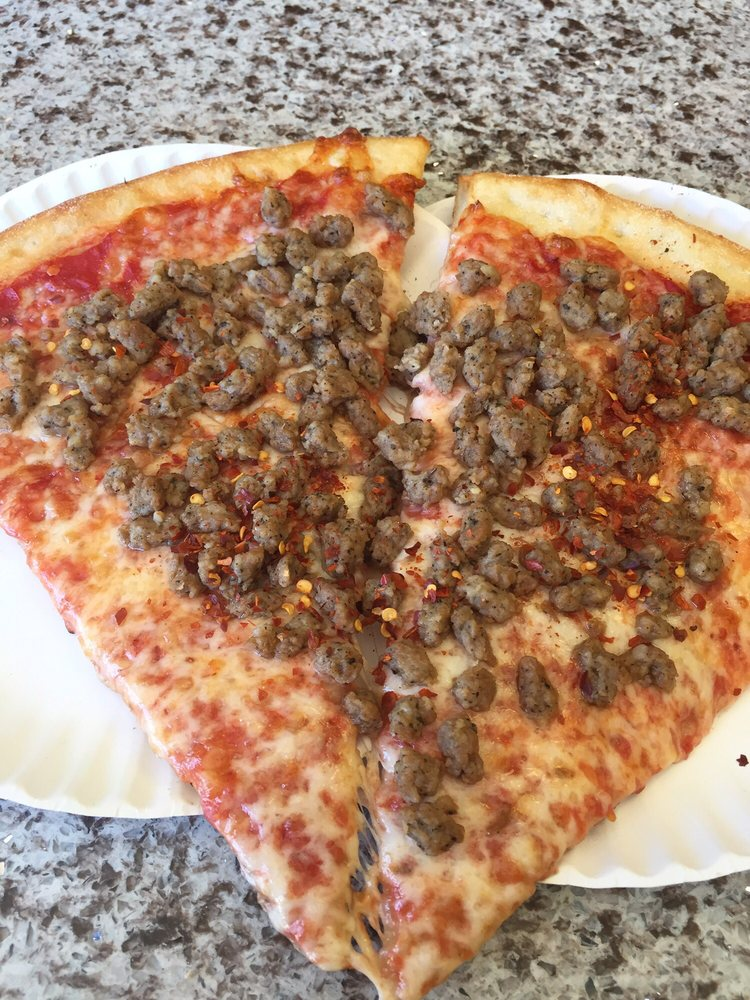

Joel S. 4 pos
Rob C. 4 pos
Korrey B. 4 pos


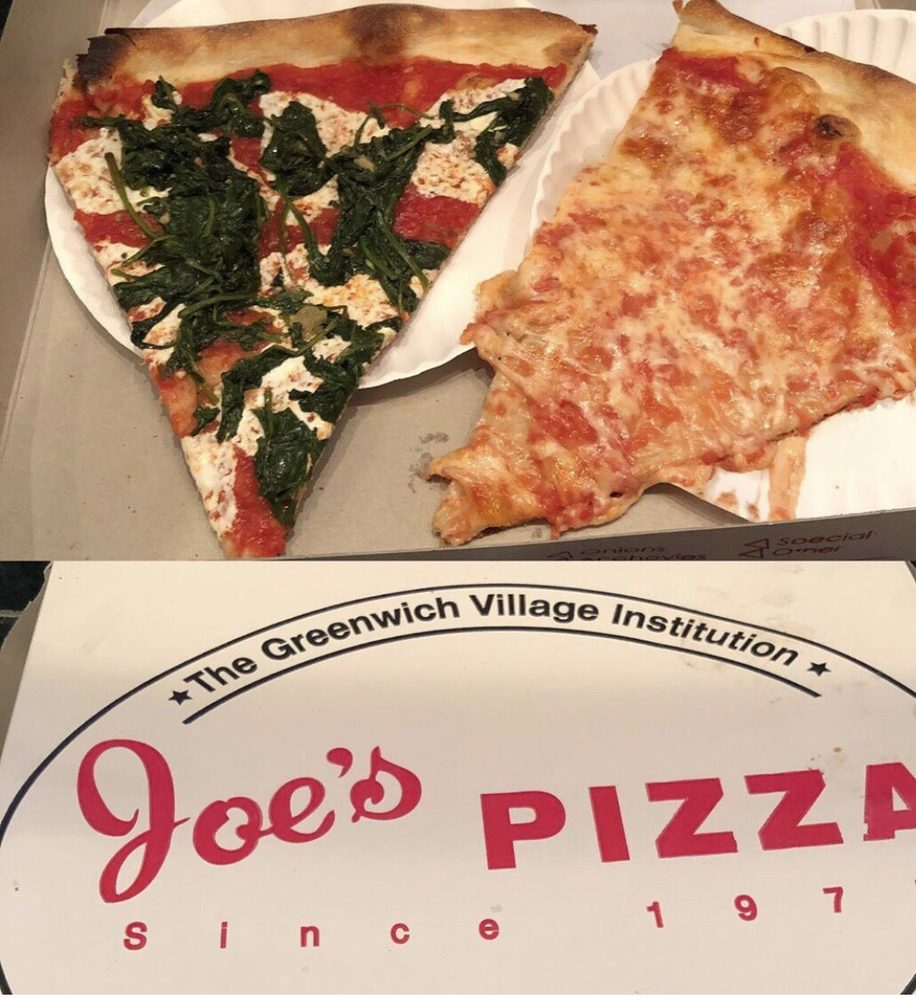

Karisma V. 5 pos
Michael H. 5 pos
Lo D. 2 neg


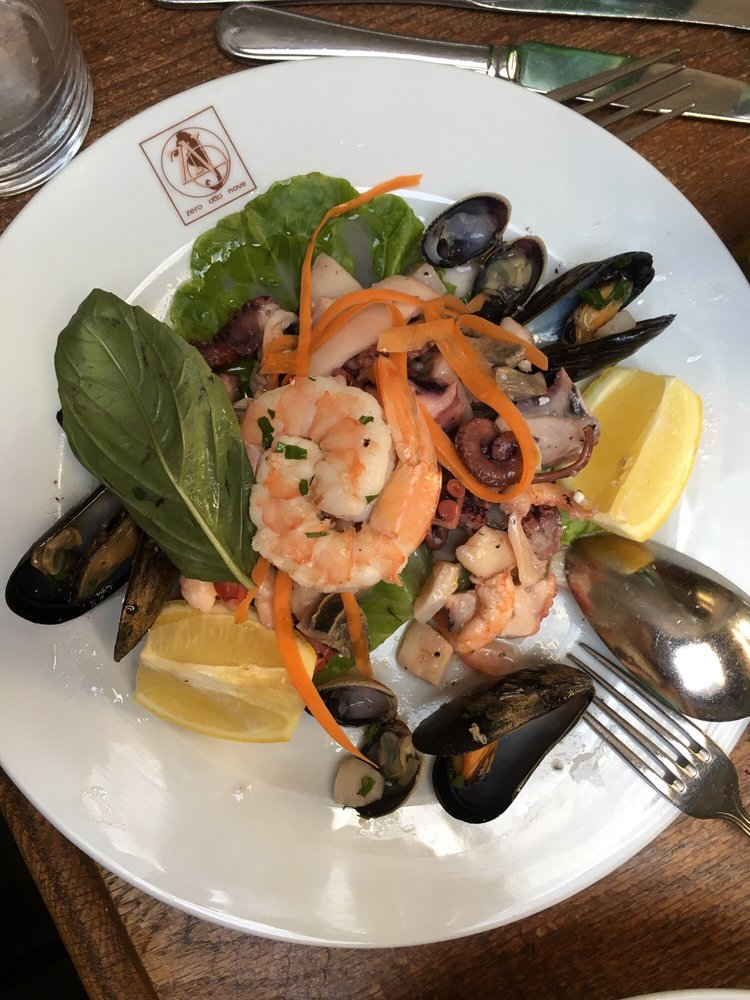

Nancy J. 5 neg
Thomas P. 3 pos
Roc R. 4 neg


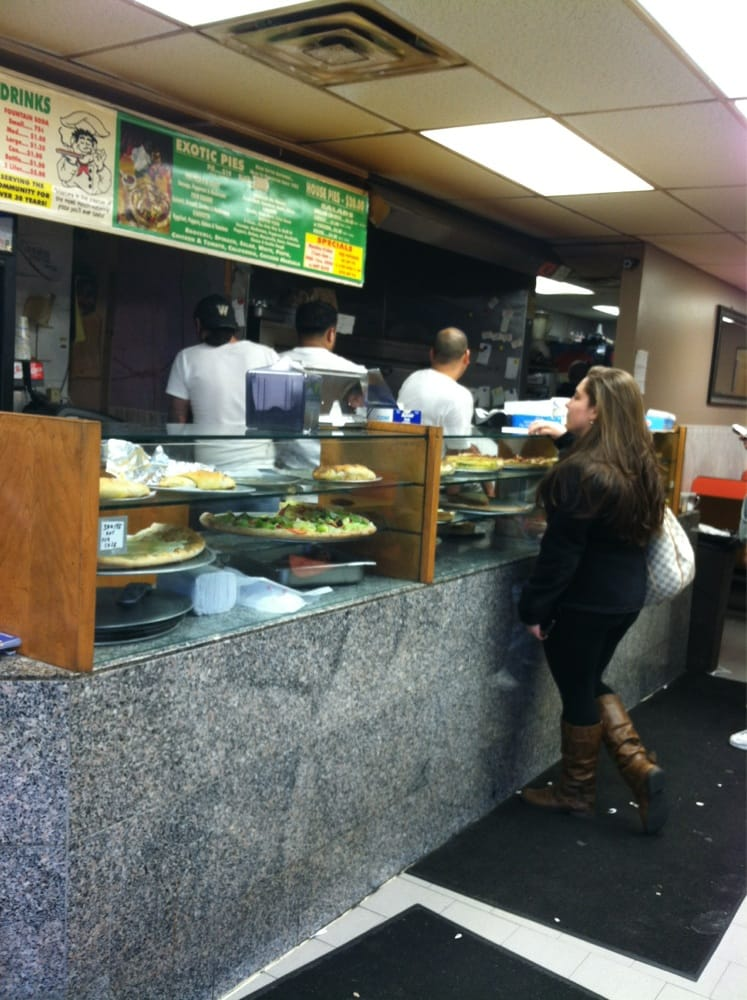

Sabrina S. 5 pos
Michael S. 3 pos
Andrew L. 5 neg


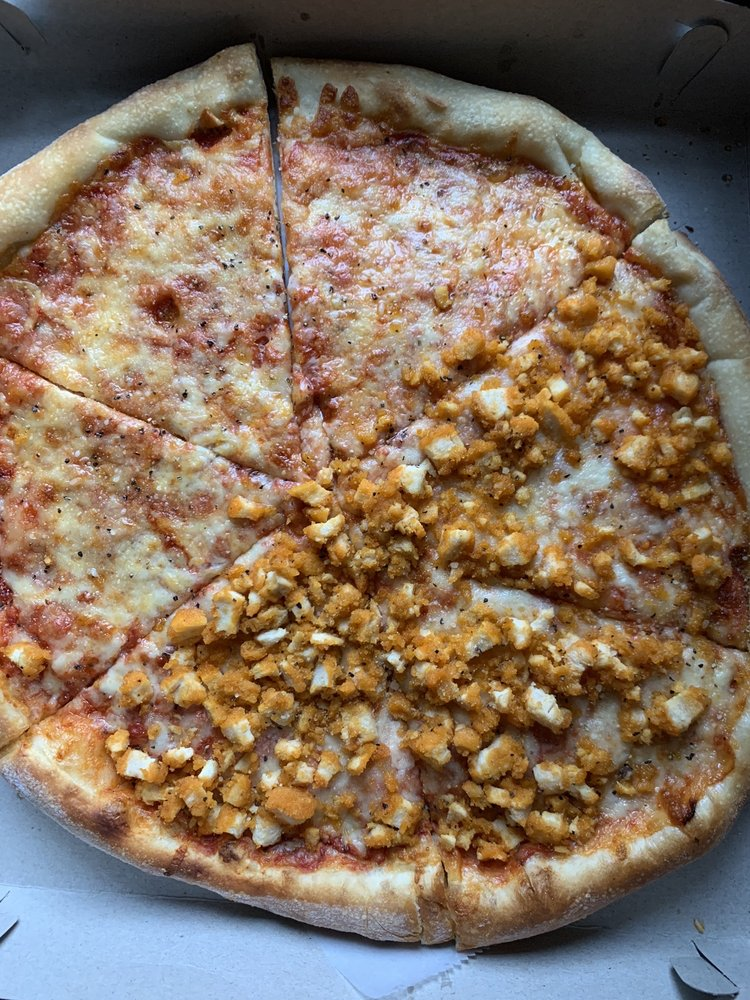

Pinky C. 5 pos
Nhi V. 4 pos
Jesus M. 1 neutral


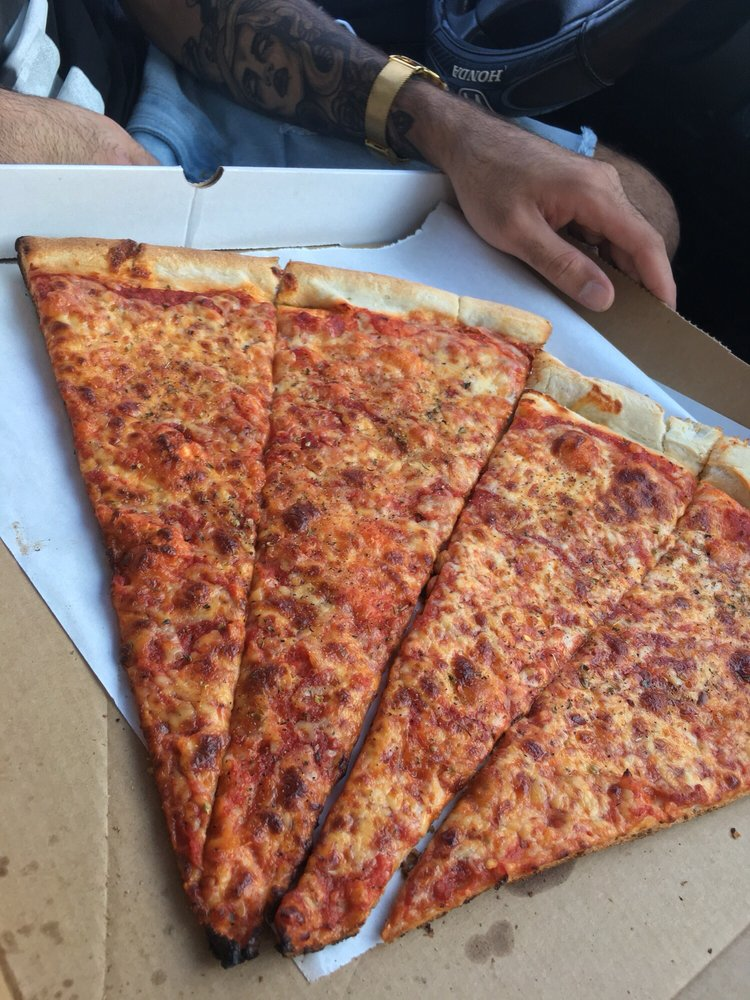

Melinda V. 5 neg
Shari F. 5 neutral
Carlos M. 5 pos


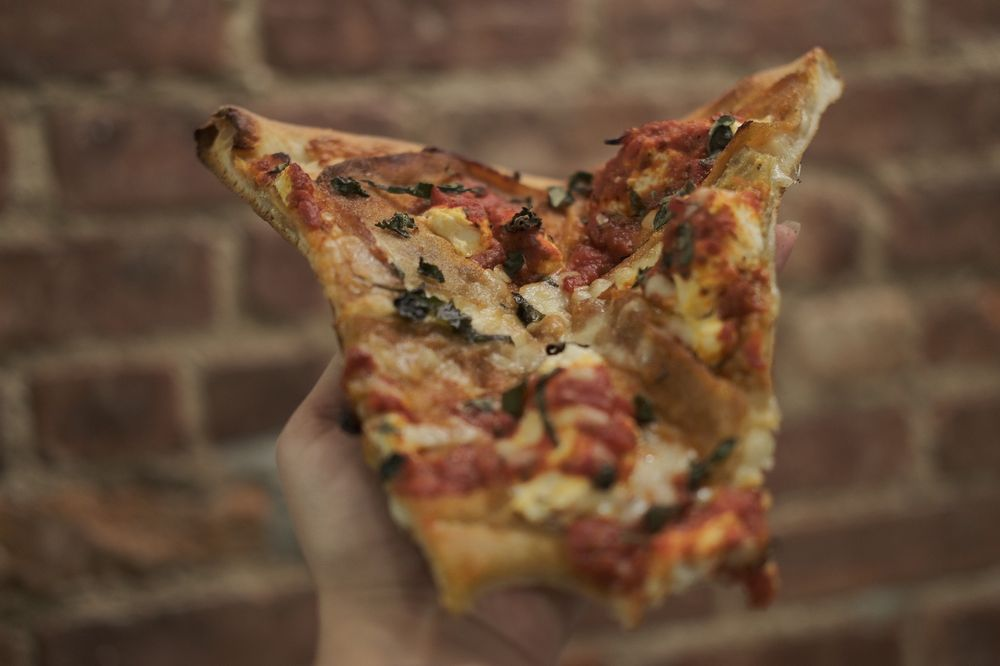

Karena M. 5 pos
Bernice N. 5 pos
Ally L. 5 neg


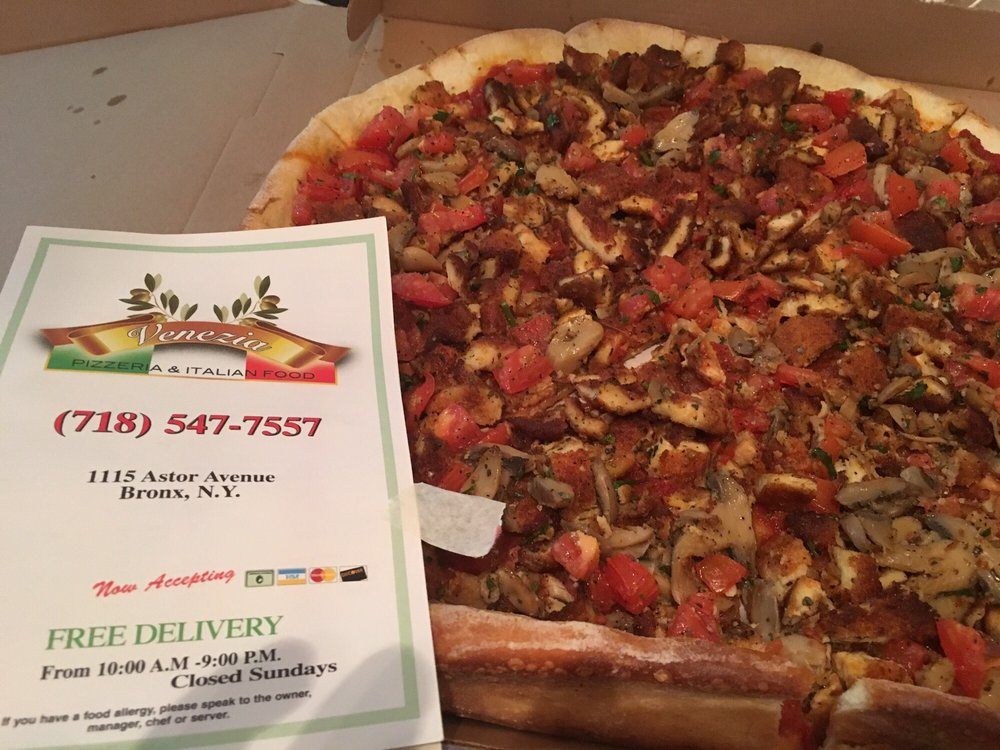

Sev S. 5 neutral
Heather C. 1 pos
Iris F. 5 pos


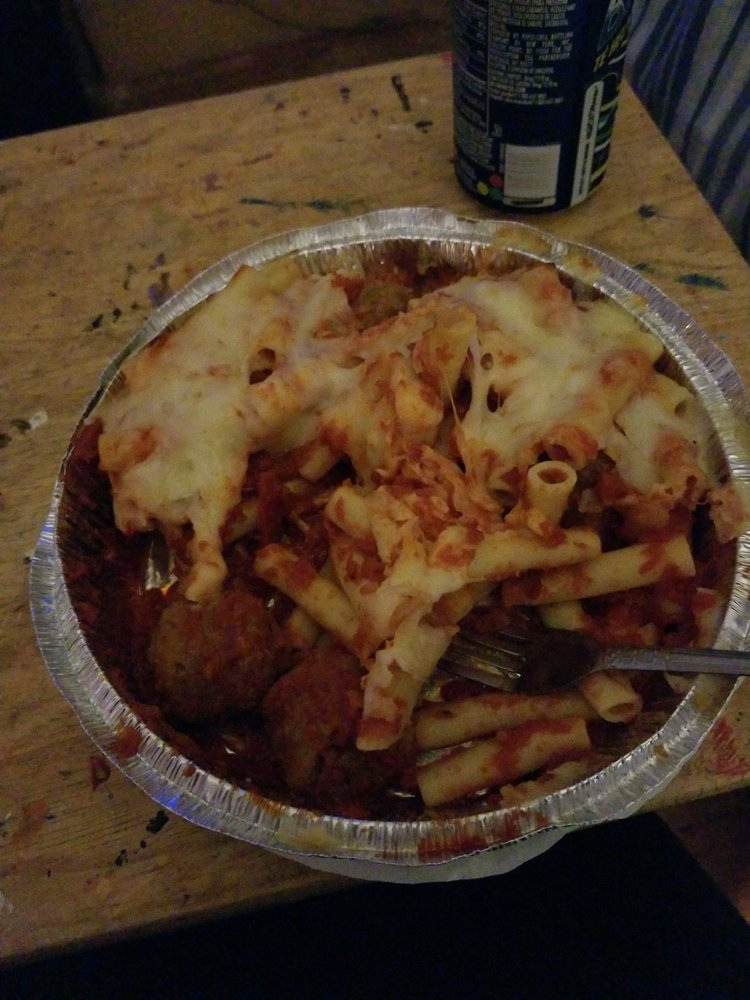

Nick D. 5 pos
Lisbeth P. 5 pos
Jessica L. 5 pos


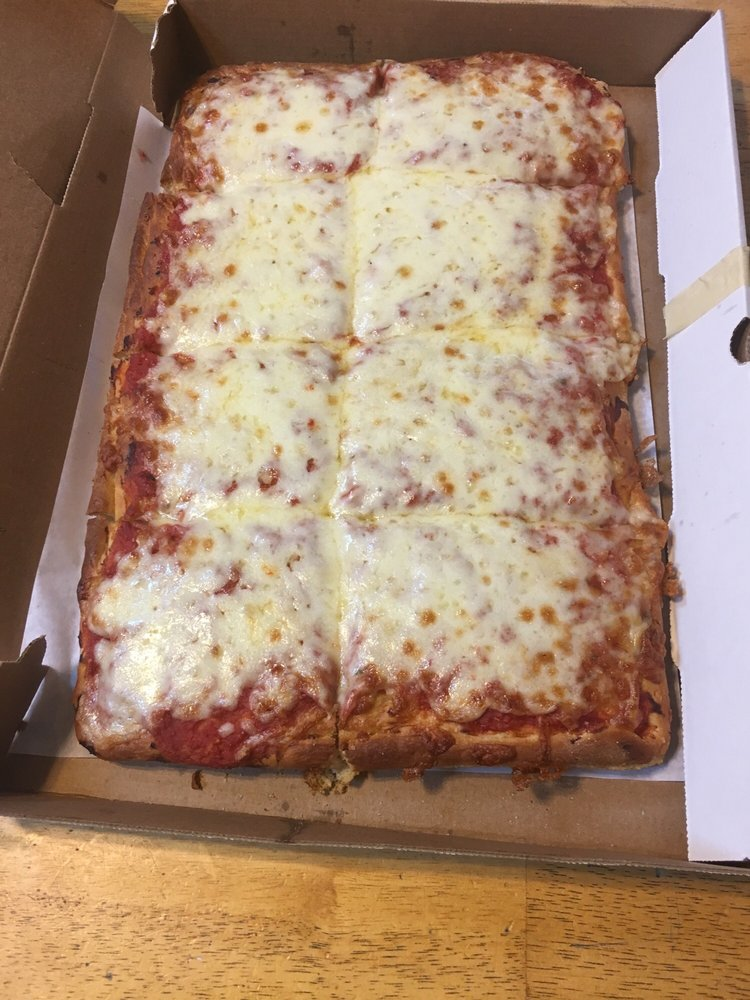

Laura A. 5 pos
Edwin T. 4 pos
Kelly D. 5 neutral


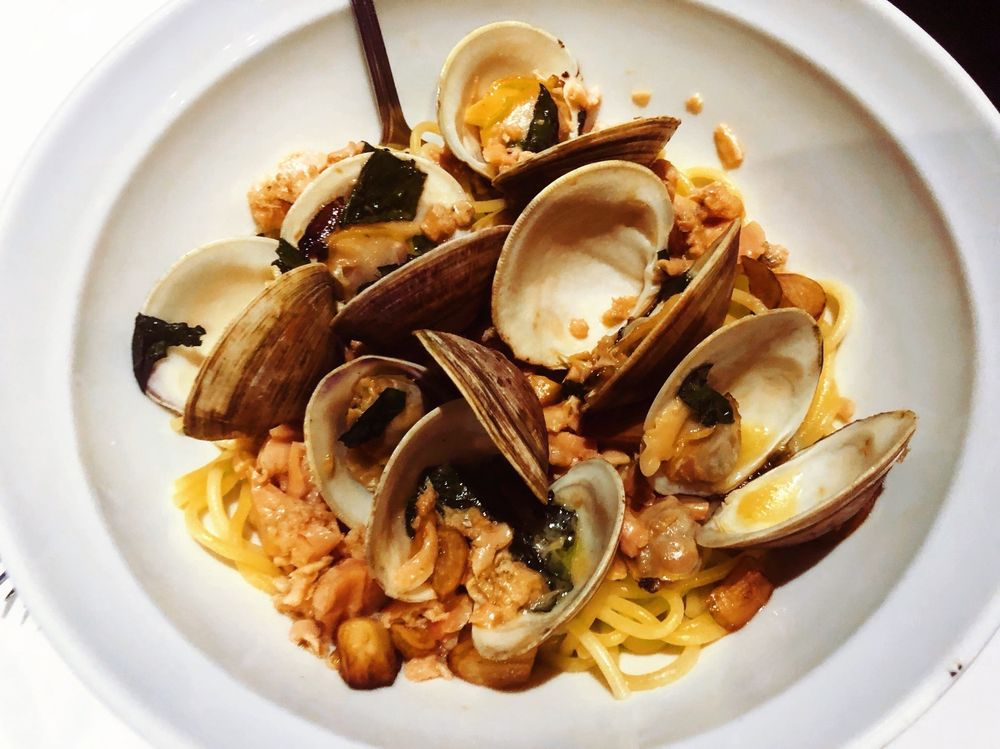

Michael S. 4 neutral
Nick P. 5 neutral
Oskar P. 2 neg


In [103]:
from IPython.display import display, HTML, Image
location = input("Enter a location: ")
cuisine = input("Enter a cuisine: ")
search_results = yelp_search(location, cuisine)
for rest in search_results:
    rest_name = rest['name']
    display(HTML(f"<h1>{rest_name}</h1>"))
    display(Image(rest['image_url'], width =200))
    reviews = yelp_reviews(rest['id'])
    for review in reviews:
        sentiment = get_sentiment(review['text'])
        print(review['user']['name'], review['rating'], sentiment)
    